# Projeto 2 - Predição 

### Nomes:
Leandra Ferreira Fontes
<br>Tainá Pereira de Bonfim <br>

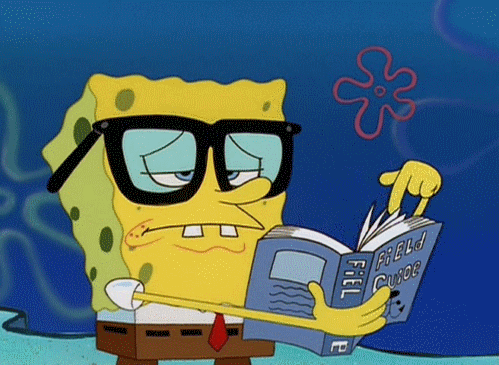

## Parte A - Introdução 


#### carregando as bibliotecas necessárias 

In [71]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import seaborn as sns

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.
from sklearn import tree
import statsmodels.api as sm

#### verificando o repositório 

In [72]:
import os
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')



Esperamos trabalhar no diretório: 
C:\Users\leand\OneDrive\Documentos\CDADOS\trabalho cdados\22-1b-cd-p2-leandra_taina-4



#### carregando a base de Dados

In [73]:
dados = pd.read_csv('dados.csv')
dados=dados.dropna()  #retirando as linhas sem informações 
#dados.isnull().sum()
print("O tamanho da base de dados é de ", len(dados))

O tamanho da base de dados é de  10642


In [74]:
#limpeza


#descartar 2 de código e título 

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results


### Objetivo
Buscamos compreender como fatores como autor, número de páginas de um livro, dentre outros, podem influenciar no abandono ou não de um livro,onde esse abandono está representado por uma variável quantitativa , que indica quantas pessoas abandoram aquele livro, segundo a nossa base de dados. Para isso utilizamos os seguintes features listados abaixo:
</ol> </li> <li> ano<ol>
</ol> </li> <li> paginas<ol>
</ol> </li> <li> rating<ol>
</ol> </li> <li> avaliacao<ol>
</ol> </li> <li> resenha<ol>
</ol> </li> <li> abandonos<ol>
</ol> </li> <li> relendo<ol>
</ol> </li> <li> querem_ler<ol>
</ol> </li> <li> lendo<ol>
</ol> </li> <li> leram<ol>
</ol> </li> <li> male<ol>
</ol> </li> <li> female<ol>


#### Base de dados utilizada:
Acesse o link abaixo: 

https://www.kaggle.com/datasets/victorstein/livros-skoob 

#### Conhecendo o nosso Data Frame 

In [75]:
dados.head()


,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,9.786556e+12,6555601566,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,9.788551e+12,8551006274,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93
2,Recursão,Blake Crouch,9.788551e+12,8551005375,2020,320,português,Intrínseca,4.4,2,618,22,2,6,295,2,E se um dia memórias vívidas de coisas que nun...,Ficção / Ficção científica / Literatura Estran...,21,79
3,"M, o Filho do Século",Antonio Scurati,9.788551e+12,855100607X,2020,816,português,Intrínseca,4.6,60,12,1,0,951,49,55,"O romance M, o Filho do Século conta em trama ...","Biografia, Autobiografia, Memórias / História ...",37,63
4,Oblivion Song: Entre Dois Mundos,Robert Kirkman,9.788551e+12,8551006258,2020,136,português,Intrínseca,4.1,166,16,0,0,376,6,184,Mestre em traçar universos distópicos permeado...,"Ficção / HQ, comics, mangá / Literatura Estran...",44,56


In [76]:
dados.describe()

,ISBN_13,ano,paginas,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,male,female
count,1.064200e+04,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,9.785962e+12,2009.246664,280.068408,3.859500,122.017196,50.500094,37.996053,10.640387,152.303890,53.538433,129.113043,26.246476,73.177786
std,1.461899e+11,58.905509,165.168242,0.708709,205.440090,125.526660,118.393596,60.553771,234.507585,129.305753,208.438098,19.427422,20.116669
min,8.551005e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.788533e+12,2007.000000,176.000000,3.600000,6.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,10.000000,61.000000
50%,9.788551e+12,2012.000000,260.000000,4.000000,26.000000,5.000000,3.000000,0.000000,35.000000,8.000000,31.000000,23.000000,76.000000
75%,9.788579e+12,2016.000000,352.000000,4.200000,130.000000,33.000000,16.000000,2.000000,195.000000,38.000000,146.000000,38.000000,89.000000
max,9.999097e+12,2021.000000,4606.000000,10.000000,999.000000,985.000000,993.000000,877.000000,999.000000,994.000000,999.000000,100.000000,100.000000


## Análise exploratória 
Aqui começaremos a analisar nosso conjunto de dados e entender suas principais características, usando métodos de visualização como tabela cruzada,gráficos de dipersão ,histogramas ,matriz de confusão ,dentre outros, a partir dos seguintes features:



### Features não consideradas :
</ol> </li>
<li> Título de publicação do livro
<ol>
    
Justificativa:
<br> Como queremos fazer uma projeção futura, esse feature não seria de bom uso, já que não daria para prever um título futuro, dado nossa base de dados. <br>
</ol> </li>
<li> Código do livro ISBN_10 e ISBN_13
<ol>
Justificativa:
<br> Há números grandes inumeras vezes repetidos, o que não seria bom para previão, além de ter mostrado uma baixa correlação na matriz de confusão. <br>
</ol> </li>
<li> Idioma
<ol>
    Justificativa: 
<br>A maioria dos dados possui o português como idioma, o que, hipoteticamente, poderia gerar uma previsão errada dos dados.<br>

In [77]:
#Deletando a coluna Título do Data Frame e verificando a correspondência do dataFrame

dados=dados.drop(['titulo','ISBN_13','ISBN_10'], axis=1)
dados.head(1)

,autor,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Nath Finanças,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72


In [78]:
valor=dados.idioma.value_counts(normalize=True)
print(valor)

print("Como é possível se observar, o Português está presente em 99% do dataFrame !")

português    0.988912
inglês       0.007048
espanhol     0.003759
francês      0.000094
holandês     0.000094
italiano     0.000094
Name: idioma, dtype: float64
Como é possível se observar, o Português está presente em 99% do dataFrame !


In [79]:
dados=dados.drop(['idioma'], axis=1)
dados.head(1)

,autor,ano,paginas,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Nath Finanças,2021,128,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72


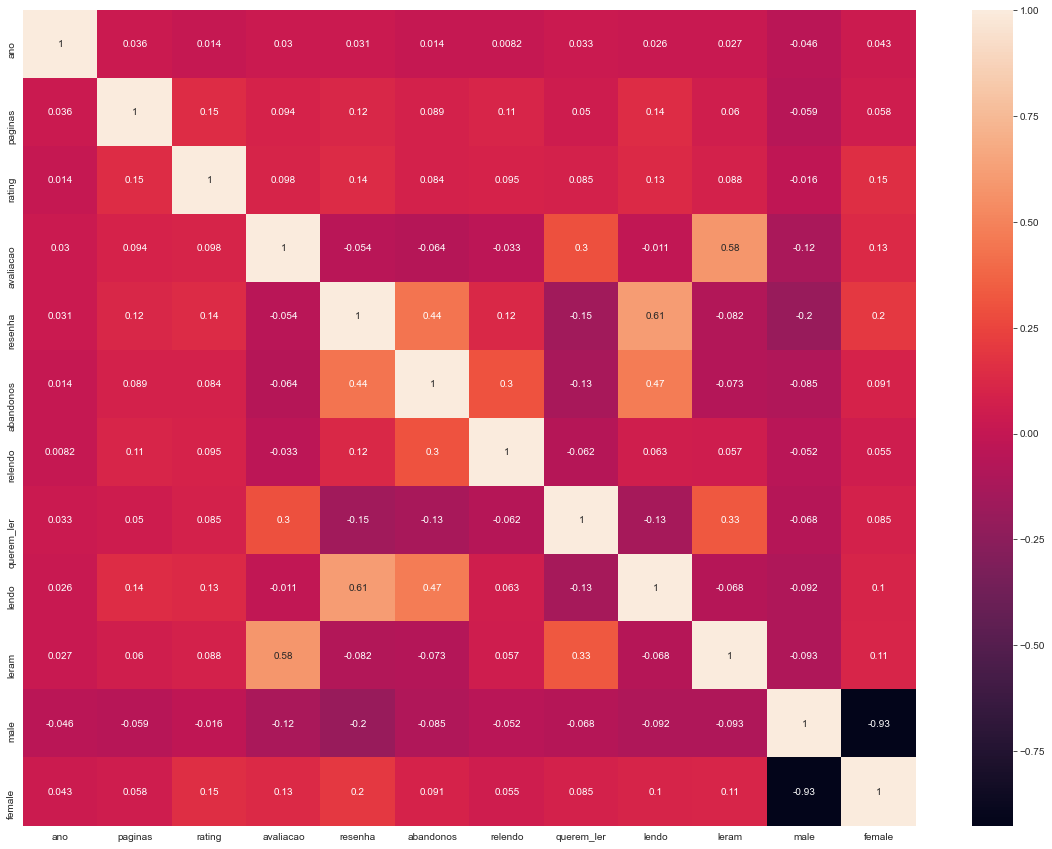

In [80]:
corr_df = dados.corr(method='pearson')

plt.figure(figsize=(20,15))
sns.heatmap(corr_df, annot=True)
plt.show()

Aqui utilizamos matriz de confusão para cruzar todos os features quantitativos com nossa target "Abandonos" e analisar quais features seriam mais relevantes, ou seja, os que possuíram a  maior correlação.


## Parte B- Minerando Dados as Características do Dataset 

In [81]:
#verificando os anos pertercentes a coluna anos no dataFrame 
lista=[]
anos=dados.ano
for ano in anos: 
    if ano not in lista: 
        lista.append(ano)
#print(lista)
autor=dados.autor
print(autor)


0                 Nath Finanças
1        Kate Elizabeth Russell
2                  Blake Crouch
3               Antonio Scurati
4                Robert Kirkman
                  ...          
11970           Fernando Pessoa
11971           Fernando Pessoa
11972             Lewis Wallace
11973              Walt Whitman
11974            Huberto Rohden
Name: autor, Length: 10642, dtype: object


In [82]:
lista=[]
for gen in dados.genero: 
    if gen not in lista: 
        lista.append(gen)
# print(lista)

In [83]:
dados.value_counts(normalize=True)
base=dados.groupby(["genero"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["genero"]).abandonos.mean().sort_values(ascending=False).head(10)

genero
Autoajuda / Literatura Brasileira / Romance                                                                989.0
Fantasia / Infantojuvenil / Literatura Estrangeira / Aventura / Ficção / Romance / Suspense e Mistério     954.0
Aventura / Fantasia / Infantojuvenil / Literatura Estrangeira / Ficção / Romance / Suspense e Mistério     954.0
Contos / Ficção / Literatura Estrangeira / Aventura                                                        937.0
Ficção / Literatura Estrangeira / Suspense e Mistério / Terror / Cinema / Romance / Drama / Horror         928.0
Ficção / Filosofia / Literatura Estrangeira / Poemas, poesias / Romance                                    905.0
]Horror / Suspense e Mistério / Ficção / Literatura Estrangeira                                            880.0
Literatura Estrangeira / Ficção / Distopia / Infantojuvenil                                                877.0
 Artes / Literatura Estrangeira / Não-ficção                                             

18


<ipython-input-99-dc2fe944339c>:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(lista_valores, explode=explode, labels=lista_genero, autopct='%1.1f%%', shadow=True, startangle=90)


ValueError: 'label' must be of length 'x'

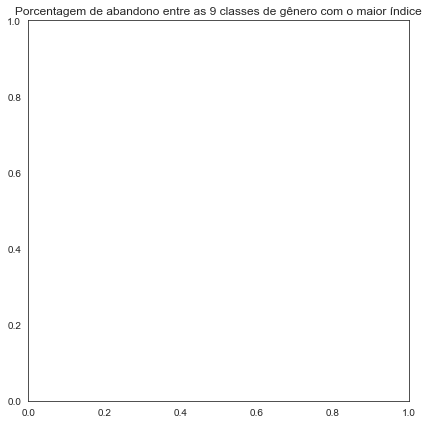

In [99]:
lista_genero=['Autoajuda / Literatura Brasileira / Romance ', 'Fantasia / Infantojuvenil / Literatura Estrangeira / Aventura / Ficção / Romance / Suspense e Mistério', 'Aventura / Fantasia / Infantojuvenil / Literatura Estrangeira / Ficção / Romance / Suspense e Mistério', 'Contos / Ficção / Literatura Estrangeira / Aventura','Ficção / Literatura Estrangeira / Suspense e Mistério / Terror / Cinema / Romance / Drama / Horror','Ficção / Filosofia / Literatura Estrangeira / Poemas, poesias / Romance','Horror / Suspense e Mistério / Ficção / Literatura Estrangeira','Literatura Estrangeira / Ficção / Distopia / Infantojuvenil','Artes / Literatura Estrangeira / Não-ficção ']
base2=dados.groupby(["genero"]).abandonos.mean().sort_values(ascending=False).head(9)
dados.groupby(["editora"]).abandonos.mean().sort_values(ascending=False).head(9)

lista_valores= []
for gen in base2: 
    lista_genero.append(gen)


#criando gráfico de pizza 
print(len(lista_genero))
explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(9, 7))
plt.title('Porcentagem de abandono entre as 9 classes de gênero com o maior índice')
plt.pie(lista_valores, explode=explode, labels=lista_genero, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(lista_genero, bbox_to_anchor=(1.3,1), loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [84]:
lista=[]
abandonos=dados.abandonos
for ab in abandonos: 
    if ab not in lista: 
        lista.append(ab)

* ### Variáveis Qualitativas- Tabelas cruzadas


In [85]:
lista=[]
for res in dados.resenha: 
    if res not in lista: 
        lista.append(res)
        
# print(lista)

In [86]:
dados.value_counts(normalize=True)
base=dados.groupby(["resenha"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["resenha"]).abandonos.mean().sort_values(ascending=False).head(10)

resenha
583    989.0
659    979.0
506    880.0
452    862.0
301    835.0
930    816.0
817    813.0
338    807.0
367    791.0
217    789.0
Name: abandonos, dtype: float64

In [87]:
lista=[]
for des in dados.descricao: 
    if des not in lista: 
        lista.append(des)
        
print(lista)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [88]:
lista=[]
for a in dados.autor: 
    if a not in lista: 
        lista.append(a)
        
#print(lista)

In [89]:
data = dados.loc[dados['autor'] == 'Kate Elizabeth Russell','abandonos']
data

1    48
Name: abandonos, dtype: int64

In [90]:

dados.value_counts(normalize=True)
base=dados.groupby(["autor"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["autor"]).abandonos.mean().sort_values(ascending=False).head(10)


autor
Thomas Bulfinch        937.000000
Friedrich Nietzsche    905.000000
Almeida Garrett        608.000000
Nancy Jo Sales         589.000000
Timur Vermes           460.000000
Isabela Freitas        423.625000
Arthur Golden          420.000000
Alyson Noël            417.105263
Jonathan Swift         414.000000
Esther Earl            410.000000
Name: abandonos, dtype: float64

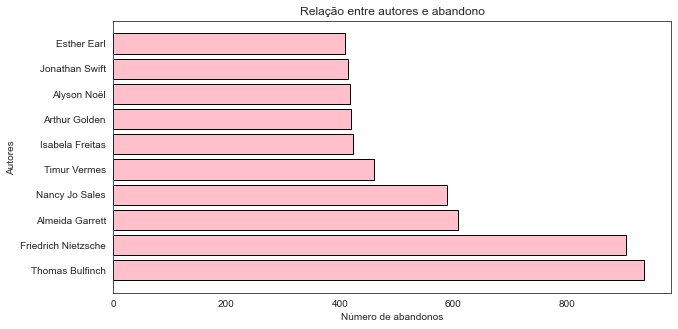

In [91]:
lista_names = ['Thomas Bulfinch', 'Friedrich Nietzsche','Almeida Garrett', 'Nancy Jo Sales', 'Timur Vermes', 'Isabela Freitas','Arthur Golden','Alyson Noël', 'Jonathan Swift', 'Esther Earl']
lista_valores= []
for i in base: 
    lista_valores.append(i)
    
plt.figure(figsize=(10, 5))

plt.barh(lista_names, lista_valores, color='pink', edgecolor='black')

plt.title("Relação entre autores e abandono")
plt.xlabel('Número de abandonos')
plt.ylabel("Autores")
plt.show()

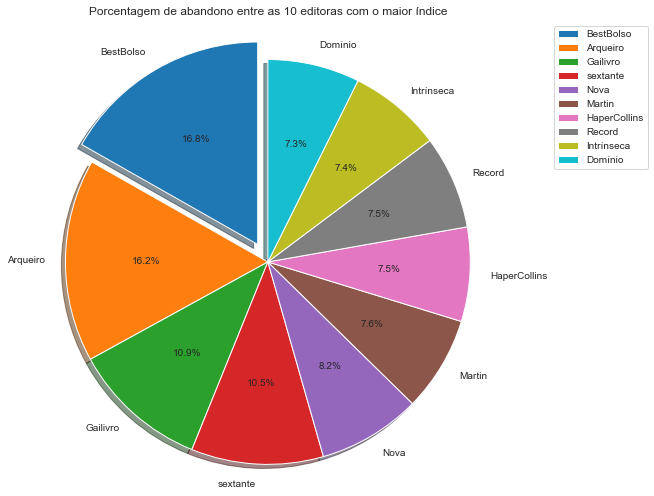

In [92]:
#crossTab é apenas para qualitativas

lista_editoras=['BestBolso', 'Arqueiro', 'Gailivro', 'sextante','Nova','Martin','HaperCollins','Record','Intrínseca','Domínio']
base2=dados.groupby(["editora"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["editora"]).abandonos.mean().sort_values(ascending=False).head(10)

lista_valores= []
for i in base: 
    lista_valores.append(i)


#criando gráfico de pizza 

explode=(0.1,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(9, 7))
plt.title('Porcentagem de abandono entre as 10 editoras com o maior índice')
plt.pie(lista_valores, explode=explode, labels=lista_editoras, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(lista_editoras, bbox_to_anchor=(1.3,1), loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.show()

Aqui analisamos as 10 editoras mais relevantes (com maior índice de correlação)

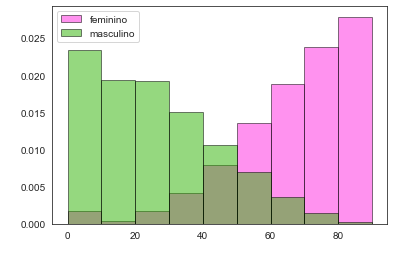

In [94]:
fem=dados.female
peso=dados['abandonos']
plt.hist(dados.female, bins=range(0,100,10), alpha=0.5, color='#FF26E1', edgecolor='black', label='feminino', density=True)
plt.hist(dados.male, bins=range(0,100,10), alpha=0.5, color='#2DB200', edgecolor='black', label='masculino', density=True)
plt.legend()
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("")
plt.show()

C:\Users\leand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


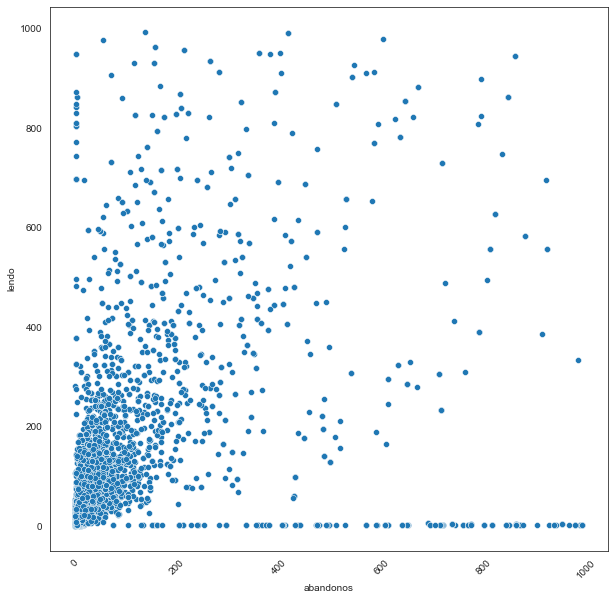

In [95]:
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('white')

plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.scatterplot(dados.abandonos, dados.lendo)
plt.show()

In [96]:
valor=dados['abandonos'].corr(dados['lendo'])
print('A correlação entre a target abandono com a feature lendo é de {}'.format(valor))

A correlação entre a target abandono com a feature lendo é de 0.4695600175356655


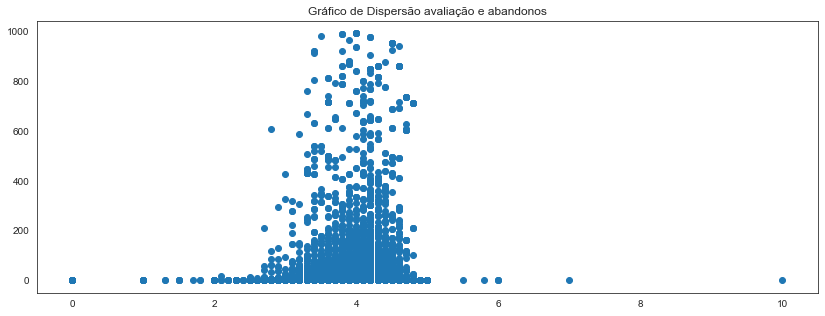

In [97]:
plt.figure(figsize=(14,5))
plt.scatter(dados['rating'],dados['abandonos'])
plt.title('Gráfico de Dispersão avaliação e abandonos')
plt.show()

In [98]:
valor=dados['rating'].corr(dados['abandonos'])
print('A correlação entre a target abandono com a feature lendo é de {}'.format(valor))

A correlação entre a target abandono com a feature lendo é de 0.08367624975683943


## regressão linear

In [51]:
feature_columns=['rating', 'lendo','relendo','querem_ler','ano','paginas','male','female']

X=dados[feature_columns]

Y=dados.abandonos

results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              abandonos   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     566.8
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:09:30   Log-Likelihood:                -64015.
No. Observations:               10642   AIC:                         1.280e+05
Df Residuals:                   10633   BIC:                         1.281e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4036     35.252     -0.040      0.968     -70.504      67.697
rating        -0.1631      1.489     -0.110      0.913      -3.083       2.756
lendo          0.4047      0.008     52.656      0.000       0.390       0.420
relendo        0.5256      0.016     32.670      0.000       0.494       0.557
querem_ler    -0.0282      0.004     -6.727      0.000      -0.036      -0.020
ano            0.0010      0.016      0.062      0.951      -0.031       0.033
paginas       -0.0015      0.006     -0.250      0.803      -0.013       0.010
male          -0.0057      0.140     -0.041      0.968      -0.280       0.268
female         0.2132      0.136      1.564      0.118      -0.054       0.480
==============================================================================
Omnibus:                     9955.463   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           524145.635
Skew:                           4.459   Prob(JB):                         0.00
Kurtosis:                      36.204   Cond. No.                     7.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
Após uma primeira análise  

SyntaxError: invalid syntax (<ipython-input-52-926b82550931>, line 1)

## regression tree

In [53]:
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

Acurracy
0.6974329357411378

0.8180599188449719


C:\Users\leand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


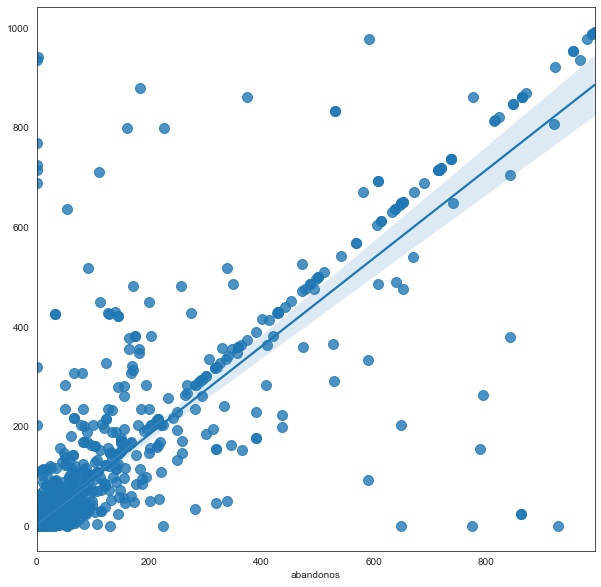

In [54]:
model=DecisionTreeRegressor()
model.fit(x_train, y_train)

expect_y=y_test
predict_y=model.predict(x_test)


print("Acurracy");print(metrics.r2_score(expect_y,predict_y))
print();print(metrics.mean_squared_log_error(expect_y, predict_y))


plt.figure(figsize=(10,10))
sns.regplot(expect_y, predict_y, scatter_kws={"s": 100} )
plt.show()

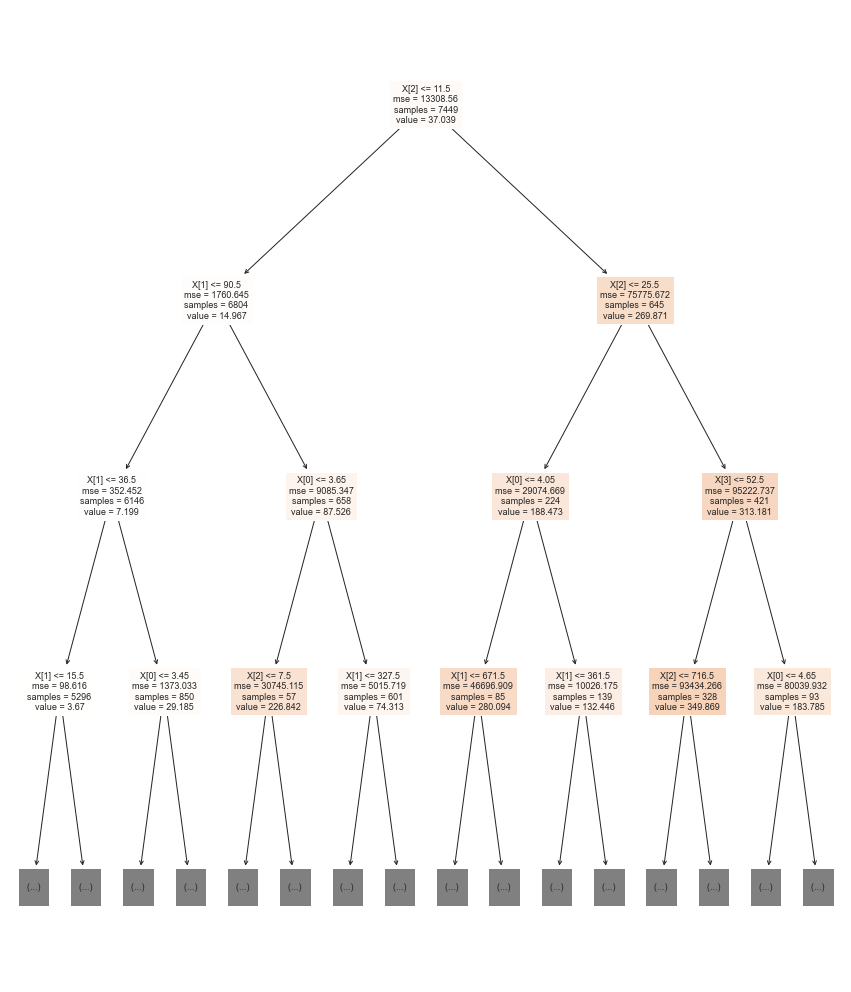

In [55]:
%matplotlib inline
plt.figure(figsize=(15,18))
tree.plot_tree(model,fontsize=9,filled=True,max_depth=3);

In [56]:
#sns.pairplot(dados, height=1.5)